In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
print("------Modules-Imported------")

/kaggle/input/facebook-ad-campaign/data.csv
------Modules-Imported------


In [2]:
dataset = pd.read_csv('/kaggle/input/facebook-ad-campaign/data.csv')
dataset.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0
1,708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0
3,708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0
4,708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0


In [3]:
dataset.dropna(inplace=True) # Removing Irrelevent Values and columns
dataset.drop(columns={'reporting_end','fb_campaign_id'},inplace=True)
dataset.head(10)

,ad_id,reporting_start,campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,17/08/2017,916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0
1,708749,17/08/2017,916,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0
2,708771,17/08/2017,916,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0
3,708815,30/08/2017,916,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0
4,708818,17/08/2017,916,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0
5,708820,17/08/2017,916,30-34,M,29,30,30,1915.0,0,0.00,1.0,1.0
6,708889,17/08/2017,916,30-34,M,15,16,17,15615.0,3,4.77,1.0,0.0
7,708895,17/08/2017,916,30-34,M,16,20,18,10951.0,1,1.27,1.0,1.0
8,708953,17/08/2017,916,30-34,M,27,31,31,2355.0,1,1.50,1.0,0.0
9,708958,30/08/2017,916,30-34,M,28,32,31,9502.0,3,3.16,1.0,0.0


In [4]:
def sum_mean(data,col1,col2=[]):
    sum_df, mean_df = [] ,[]
    for i in data[col1].unique():
        d = data[data[col1] == i]
        s, m = [i], [i]
        if len(col2) == 0:
            col2 = [x for x in data.columns if x != col1]
        for j in col2:
            s.append(d[j].sum())
            m.append(d[j].sum())
        sum_df.append(s)
        mean_df.append(m)
    return sum_df,mean_df

In [5]:
sum_df,mean_df = sum_mean(dataset,'reporting_start',['clicks'])
dt1 = pd.DataFrame(sum_df)

dt1.columns = ['reporting_start','clicks']
dt1['reporting_start'] = pd.to_datetime(dt1['reporting_start'])
dt_sorted = dt1.sort_values(by="reporting_start")
dt_sorted.head()

,reporting_start,clicks
0,2017-08-17,39
3,2017-08-18,374
4,2017-08-19,1011
9,2017-08-20,1057
10,2017-08-21,639


In [6]:
dataset.describe()

,ad_id,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
count,7.610000e+02,761.000000,761.000000,761.000000,7.610000e+02,761.000000,761.000000,761.000000,761.000000
mean,8.956389e+05,25.473062,28.977661,28.984231,1.031716e+05,15.340342,25.782181,2.161629,0.768725
std,1.670937e+05,15.508898,15.607548,15.604816,2.462644e+05,32.715738,57.622334,4.062201,1.656445
min,7.087460e+05,2.000000,3.000000,3.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.480860e+05,16.000000,19.000000,19.000000,3.149000e+03,0.000000,0.000000,1.000000,0.000000
50%,7.811750e+05,22.000000,26.000000,25.000000,1.219300e+04,3.000000,3.580000,1.000000,0.000000
75%,1.121184e+06,29.000000,33.000000,33.000000,8.597000e+04,14.000000,23.210000,2.000000,1.000000
max,1.121593e+06,66.000000,72.000000,72.000000,3.052003e+06,340.000000,639.949998,60.000000,21.000000


In [7]:
dataset.shape

(761, 13)

ad_id                     AxesSubplot(0.125,0.125;0.0731132x0.755)
interest1              AxesSubplot(0.212736,0.125;0.0731132x0.755)
interest2              AxesSubplot(0.300472,0.125;0.0731132x0.755)
interest3              AxesSubplot(0.388208,0.125;0.0731132x0.755)
impressions            AxesSubplot(0.475943,0.125;0.0731132x0.755)
clicks                 AxesSubplot(0.563679,0.125;0.0731132x0.755)
spent                  AxesSubplot(0.651415,0.125;0.0731132x0.755)
total_conversion       AxesSubplot(0.739151,0.125;0.0731132x0.755)
approved_conversion    AxesSubplot(0.826887,0.125;0.0731132x0.755)
dtype: object

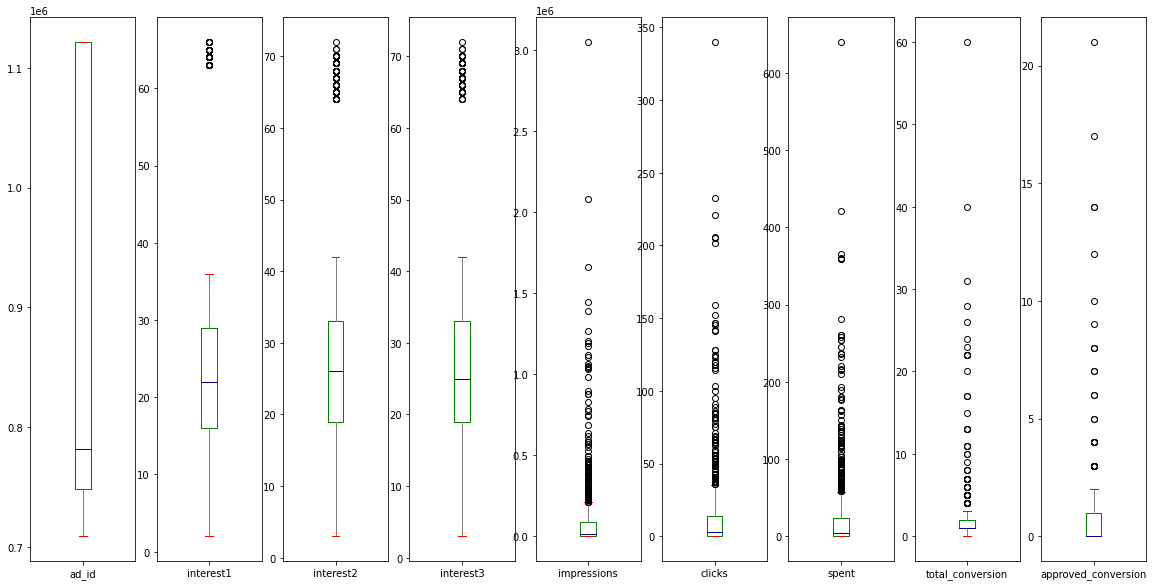

In [8]:
colors={'whiskers':'gray','medians':'DarkBlue','caps':'red','boxes':'green'}
dataset.plot.box(figsize=(20,10),subplots=True,color=colors)

In [9]:

for i in dataset.columns:
    print(f'{i}: {dataset[i].unique()}')

ad_id: [ 708746  708749  708771  708815  708818  708820  708889  708895  708953
  708958  708979  709023  709038  709040  709059  709105  709115  709124
  709179  709183  709320  709323  709326  709327  709328  709455  709544
  709614  709756  709761  709899  709901  710045  710088  710360  710477
  710480  710571  710617  710623  710628  710682  710763  710836  710867
  710880  710961  710968  711217  711623  711764  711785  711877  712052
  734209  734210  734215  734243  734266  734272  734290  734313  734314
  734352  734361  734381  734399  734418  734421  734427  734433  734582
  734605  734660  734666  734726  734737  734785  734794  734796  734800
  734803  734852  734854  734856  734866  734881  734901  734903  734925
  734939  734968  734999  735014  735032  735033  735043  735048  735065
  735109  735140  735143  735151  735184  735189  735213  735220  735242
  735247  735289  735290  735298  736869  736890  736893  736977  736988
  736995  736997  737097  737130  737320  73

****Results****

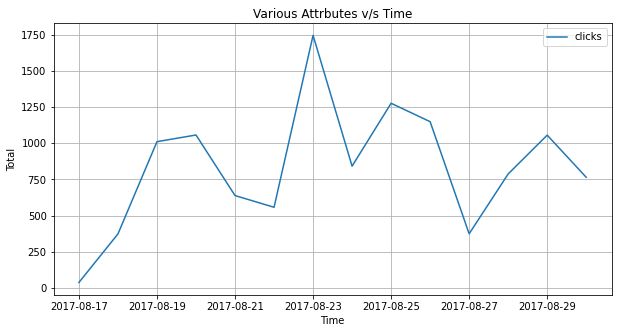

In [10]:
plt.figure(figsize=(10,5))



for i in ['clicks']:
        
    plt.plot(dt_sorted['reporting_start'],dt_sorted[i],label='clicks')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Total')
plt.title('Various Attrbutes v/s Time')
plt.grid()

**ad_id for every campaign_id**

In [11]:
id = dataset[["ad_id", "campaign_id"]]
id.head()


,ad_id,campaign_id
0,708746,916
1,708749,916
2,708771,916
3,708815,916
4,708818,916


**total impressions and clicks**

In [12]:
df = pd.DataFrame(dataset)
df.sum(axis=0,skipna=True)
#total_impressions for 30-34 age group
#impressions                                                   78513588.0
#total clicks 

ad_id                                                          681581184
reporting_start        17/08/201717/08/201717/08/201730/08/201717/08/...
campaign_id            9169169169169169169169169169169169169169169169...
age                    30-3430-3430-3430-3430-3430-3430-3430-3430-343...
gender                 MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFF...
interest1                                                          19385
interest2                                                          22052
interest3                                                          22057
impressions                                                   78513588.0
clicks                                                             11674
spent                                                       19620.239997
total_conversion                                                  1645.0
approved_conversion                                                585.0
dtype: object

total_impressions for 30-34 age group =  78513588.0                                               
total clicks = 11674